Comienzo TP 3

-Predicción de reincidencia a partir de un dataset de presos de la República Argentina.

Impostamos las librerias utilizadas

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import RocCurveDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score, KFold

In [2]:
data = pd.DataFrame(pd.read_csv('.\sneep-2021.csv',sep=','))

data.head(5)


,censo_anio,provincia_sneep_id,provincia_descripcion,establecimiento_id,establecimiento_descripcion,edad,genero_id,genero_descripcion,nacionalidad_id,nacionalidad_descripcion,...,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_prision_discontinua_descripcion,participa_programa_semi_detencion_id,participa_programa_semi_detencion_descripcion,tuvo_reduccion_pena_id,tuvo_reduccion_pena_descripcion,mujer_tiene_hijos_intramuro,provincia_id,ultima_provincia_residencia_id
0,2021,5,Chaco,196,COMPLEJO PENITENCIARIO I RESISTENCIA,36,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,22,22.0
1,2021,5,Chaco,196,COMPLEJO PENITENCIARIO I RESISTENCIA,42,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,22,22.0
2,2021,5,Chaco,196,COMPLEJO PENITENCIARIO I RESISTENCIA,26,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,22,22.0
3,2021,5,Chaco,196,COMPLEJO PENITENCIARIO I RESISTENCIA,24,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,22,22.0
4,2021,5,Chaco,196,COMPLEJO PENITENCIARIO I RESISTENCIA,29,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,22,22.0


In [3]:
data.shape

(101267, 86)

Nos quedamos con solo los presos condenados.

In [4]:
data["situacion_legal_descripcion"].unique()

array(['Condenado/a', 'Procesado/a', 'Inimputable', 'Otra situación'],
      dtype=object)

In [5]:
condenados = data["situacion_legal_descripcion"]=='Condenado/a'

data_condenados = data[condenados]

In [6]:
data_condenados.shape

(55933, 86)

Eliminamos las columnas que no utilizaremos

In [7]:
col_drop = [
'censo_anio'
,'provincia_sneep_id'
#,'provincia_descripcion'
,'establecimiento_id'
,'establecimiento_descripcion'
,'genero_id'
,'nacionalidad_id'
,'nacionalidad_descripcion'
,'estado_civil_id'
,'nivel_instruccion_id'
,'ultima_situacion_laboral_id'
,'capacitacion_laboral_al_ingresar_id'
,'ultimo_lugar_residencia_id'
,'ultimo_lugar_residencia_descripcion'
,'ultima_provincia_residencia_sneep_id'
,'ultima_provincia_residencia_descripcion'
,'jurisdiccion_id'
,'jurisdiccion_descripcion'
,'situacion_legal_id'
,'situacion_legal_descripcion'
,'fecha_detencion'
,'fecha_condenado'
,'establecimiento_procedencia_id'
,'establecimiento_procedencia_descripcion'
,'delito1_id'
,'delito1_descripcion'
,'delito2_id'
,'delito2_descripcion'
,'delito3_id'
,'delito3_descripcion'
,'delito4_id'
,'delito4_descripcion'
,'delito5_id'
,'delito5_descripcion'
,'horas_trabajo_remunerado_id'
,'horas_trabajo_remunerado_descripcion'
,'participacion_programa_educativo_id'
,'participacion_actividades_deportivas'
,'recibio_atencion_medica_ult_anio'
,'recibio_atencion_medica_ult_anio_descripcion'
,'recibio_visitas_ultimo_anio'
,'participo_alteracion_orden_ult_anio_id'
,'tipo_infraccion_disciplinaria_id'
,'tipo_infraccion_disciplinaria_descripcion'
,'sancion_aplicada_id'
,'sancion_aplicada_descripcion'
,'calificacion_conducta_id'
,'tentativa_fugas_evasiones_id'
,'tentativa_suicidio'
,'fue_lesionado_id'
,'fue_lesionado_descripcion'
,'tipo_condena'
,'es_reincidente_id'
,'tiene_periodo_progresividad_id'
,'tiene_periodo_progresividad_descripcion'
,'reparticion_id'
,'reparticion_descripcion'
,'tuvo_salidas_transitorias_id'
,'incorporado_reg_semi_libertad_id'
,'participa_programa_prision_discontinua_id'
,'participa_programa_semi_detencion_id'
,'tuvo_reduccion_pena_id'
,'mujer_tiene_hijos_intramuro'
,'provincia_id'
,'ultima_provincia_residencia_id'
,'incorporado_reg_semi_libertad_descripcion'
,'participa_programa_pre_libertad' 
,'participa_programa_prision_discontinua_descripcion'
,'participa_programa_semi_detencion_descripcion'
,'duracion_condena_rango'
,'tuvo_salidas_transitorias_descripcion'
,'tuvo_reduccion_pena_descripcion'
]


data_condenados = data_condenados.drop(columns=col_drop)




In [8]:
data_condenados.head(5)

,provincia_descripcion,edad,genero_descripcion,estado_civil_descripcion,nivel_instruccion_descripcion,ultima_situacion_laboral_descripcion,capacitacion_laboral_al_ingresar_descripcion,participacion_programa_laboral,participacion_programa_educativo_descripcion,participo_alteracion_orden_ult_anio_descripcion,calificacion_conducta_descripcion,tentativa_fugas_evasiones_descripcion,duracion_condena_anios,duracion_condena_meses,es_reincidente_descripcion
0,Chaco,36,Varón,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Buena,No,0,0,Primario/a
1,Chaco,42,Varón,Soltero/a,Secundario completo,Trabajador/ra de tiempo parcial,Tiene algún oficio,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,4,0,Primario/a
2,Chaco,26,Varón,Soltero/a,Secundario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,4,0,Primario/a
3,Chaco,24,Varón,Soltero/a,Secundario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,4,0,Primario/a
4,Chaco,29,Varón,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,11,0,Primario/a


eliminamos los registros que no poseen tiempo de condena

In [9]:
sin_condena = np.logical_and(data_condenados.duracion_condena_anios == 0, data_condenados.duracion_condena_meses == 0)

data_condenados.drop(data_condenados[sin_condena].index, inplace=True)

data_condenados.shape

(52340, 15)

In [10]:
data_condenados.isnull().sum()

provincia_descripcion                                 0
edad                                                  0
genero_descripcion                                    0
estado_civil_descripcion                            800
nivel_instruccion_descripcion                       515
ultima_situacion_laboral_descripcion               1163
capacitacion_laboral_al_ingresar_descripcion        271
participacion_programa_laboral                     1085
participacion_programa_educativo_descripcion       1049
participo_alteracion_orden_ult_anio_descripcion      67
calificacion_conducta_descripcion                   610
tentativa_fugas_evasiones_descripcion               122
duracion_condena_anios                                0
duracion_condena_meses                                0
es_reincidente_descripcion                         1580
dtype: int64

In [11]:
data_condenados.dropna(inplace=True)

In [12]:
data_condenados.shape

(47446, 15)

In [13]:
data_condenados.head(5)

,provincia_descripcion,edad,genero_descripcion,estado_civil_descripcion,nivel_instruccion_descripcion,ultima_situacion_laboral_descripcion,capacitacion_laboral_al_ingresar_descripcion,participacion_programa_laboral,participacion_programa_educativo_descripcion,participo_alteracion_orden_ult_anio_descripcion,calificacion_conducta_descripcion,tentativa_fugas_evasiones_descripcion,duracion_condena_anios,duracion_condena_meses,es_reincidente_descripcion
1,Chaco,42,Varón,Soltero/a,Secundario completo,Trabajador/ra de tiempo parcial,Tiene algún oficio,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,4,0,Primario/a
2,Chaco,26,Varón,Soltero/a,Secundario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,4,0,Primario/a
3,Chaco,24,Varón,Soltero/a,Secundario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,4,0,Primario/a
4,Chaco,29,Varón,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,11,0,Primario/a
6,Chaco,25,Varón,Soltero/a,Secundario incompleto,Trabajador/ra de tiempo parcial,Tiene algún oficio,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Ejemplar,No,6,8,Primario/a


Pasamos las condenas a meses

In [14]:
# solo anio de condena

data_condenados.loc[25]

provincia_descripcion                                                                  Chaco
edad                                                                                      26
genero_descripcion                                                                     Varón
estado_civil_descripcion                                                           Soltero/a
nivel_instruccion_descripcion                                            Primario incompleto
ultima_situacion_laboral_descripcion                                            Desocupado/a
capacitacion_laboral_al_ingresar_descripcion                 No tiene ni oficio ni profesión
participacion_programa_laboral                                                           0.0
participacion_programa_educativo_descripcion       No participa de ningún programa educativo
participo_alteracion_orden_ult_anio_descripcion           No participó de ninguna alteración
calificacion_conducta_descripcion                                     

In [15]:
# año y meses de condena

data_condenados.loc[6]

provincia_descripcion                                                                  Chaco
edad                                                                                      25
genero_descripcion                                                                     Varón
estado_civil_descripcion                                                           Soltero/a
nivel_instruccion_descripcion                                          Secundario incompleto
ultima_situacion_laboral_descripcion                         Trabajador/ra de tiempo parcial
capacitacion_laboral_al_ingresar_descripcion                              Tiene algún oficio
participacion_programa_laboral                                                           0.0
participacion_programa_educativo_descripcion       No participa de ningún programa educativo
participo_alteracion_orden_ult_anio_descripcion           No participó de ninguna alteración
calificacion_conducta_descripcion                                     

In [16]:
anio_y_meses = np.logical_and(data_condenados.duracion_condena_anios > 0, data_condenados.duracion_condena_meses > 0)

data_condenados.loc[data_condenados[anio_y_meses].index, 'duracion_condena_meses'] = data_condenados.duracion_condena_meses + (data_condenados.duracion_condena_anios * 12)

data_condenados.loc[6]

provincia_descripcion                                                                  Chaco
edad                                                                                      25
genero_descripcion                                                                     Varón
estado_civil_descripcion                                                           Soltero/a
nivel_instruccion_descripcion                                          Secundario incompleto
ultima_situacion_laboral_descripcion                         Trabajador/ra de tiempo parcial
capacitacion_laboral_al_ingresar_descripcion                              Tiene algún oficio
participacion_programa_laboral                                                           0.0
participacion_programa_educativo_descripcion       No participa de ningún programa educativo
participo_alteracion_orden_ult_anio_descripcion           No participó de ninguna alteración
calificacion_conducta_descripcion                                     

In [17]:
meses_condena_0 = data_condenados.duracion_condena_meses == 0

data_condenados.loc[data_condenados[meses_condena_0].index, 'duracion_condena_meses'] = data_condenados.duracion_condena_anios * 12

data_condenados.loc[25]

provincia_descripcion                                                                  Chaco
edad                                                                                      26
genero_descripcion                                                                     Varón
estado_civil_descripcion                                                           Soltero/a
nivel_instruccion_descripcion                                            Primario incompleto
ultima_situacion_laboral_descripcion                                            Desocupado/a
capacitacion_laboral_al_ingresar_descripcion                 No tiene ni oficio ni profesión
participacion_programa_laboral                                                           0.0
participacion_programa_educativo_descripcion       No participa de ningún programa educativo
participo_alteracion_orden_ult_anio_descripcion           No participó de ninguna alteración
calificacion_conducta_descripcion                                     

quitamos la columna de anio

In [18]:
data_condenados = data_condenados.drop(columns='duracion_condena_anios')

In [19]:
data_condenados.head(5)

,provincia_descripcion,edad,genero_descripcion,estado_civil_descripcion,nivel_instruccion_descripcion,ultima_situacion_laboral_descripcion,capacitacion_laboral_al_ingresar_descripcion,participacion_programa_laboral,participacion_programa_educativo_descripcion,participo_alteracion_orden_ult_anio_descripcion,calificacion_conducta_descripcion,tentativa_fugas_evasiones_descripcion,duracion_condena_meses,es_reincidente_descripcion
1,Chaco,42,Varón,Soltero/a,Secundario completo,Trabajador/ra de tiempo parcial,Tiene algún oficio,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,48,Primario/a
2,Chaco,26,Varón,Soltero/a,Secundario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,48,Primario/a
3,Chaco,24,Varón,Soltero/a,Secundario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,48,Primario/a
4,Chaco,29,Varón,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,132,Primario/a
6,Chaco,25,Varón,Soltero/a,Secundario incompleto,Trabajador/ra de tiempo parcial,Tiene algún oficio,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Ejemplar,No,80,Primario/a


<AxesSubplot:xlabel='es_reincidente_descripcion', ylabel='Count'>

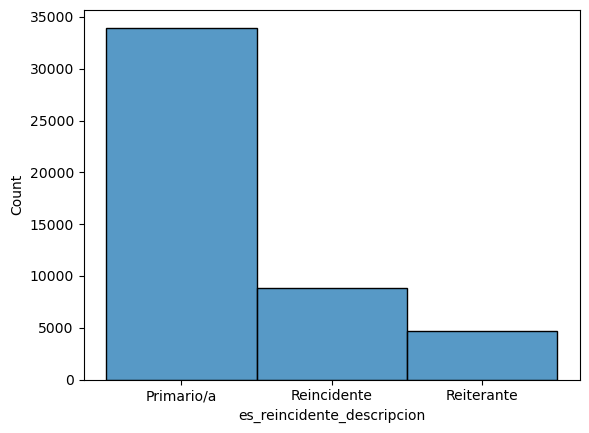

In [20]:
sns.histplot(data=data_condenados["es_reincidente_descripcion"],discrete = True)

#Hay una diferenciación entre persona reiterante y persona reincidente. Se considera reiterante a alguien que es condenado por un delito idéntico o análogo a aquel por el cual fue condenado anteriormente. Reincidente es una persona que comete un delito distinto al último por el que fue detenido


Vamos a pasar a binarias las columnas categóricas que utilizaremos para predecir

In [21]:
data_condenados.genero_descripcion.value_counts()

Varón                   45697
Mujer                    1695
Trans Mujer/Travesti       40
Trans Varón                14
Name: genero_descripcion, dtype: int64

In [22]:
delete_genero = np.logical_or(data_condenados.genero_descripcion == 'Trans Mujer/Travesti', data_condenados.genero_descripcion == 'Trans Varón')

data_condenados.drop(data_condenados[delete_genero].index, inplace=True)

In [23]:

data_condenados.loc[data_condenados.genero_descripcion == 'Varón', 'Genero_Varon'] = 1

data_condenados.loc[data_condenados.genero_descripcion != 'Varón', 'Genero_Varon'] = 0

data_condenados = data_condenados.drop(columns='genero_descripcion')



In [24]:
data_condenados.Genero_Varon.value_counts()

1.0    45697
0.0     1695
Name: Genero_Varon, dtype: int64

In [25]:
data_condenados.estado_civil_descripcion.value_counts()

Soltero/a                    36189
Concubino/a                   5931
Casado/a                      3851
Separado/a o divorciado/a      786
Viudo/a                        335
Separado/a de hecho            300
Name: estado_civil_descripcion, dtype: int64

In [26]:
data_condenados.loc[data_condenados.estado_civil_descripcion == 'Soltero/a', 'Estado_Civil_Soltero'] = 1

data_condenados.loc[data_condenados.estado_civil_descripcion != 'Soltero/a', 'Estado_Civil_Soltero'] = 0


data_condenados = data_condenados.drop(columns='estado_civil_descripcion')



In [27]:
data_condenados.Estado_Civil_Soltero.value_counts()

1.0    36189
0.0    11203
Name: Estado_Civil_Soltero, dtype: int64

In [28]:
data_condenados.nivel_instruccion_descripcion.value_counts()

Primario completo           15371
Secundario incompleto       12321
Primario incompleto         11932
Secundario completo          4458
Ninguno                      2267
Universitario incompleto      408
Terciario incompleto          271
Terciario completo            265
Universitario completo         99
Name: nivel_instruccion_descripcion, dtype: int64

In [29]:
#Primario = Primario incompleto + Primario Completo
#Secundario = Secundario incompleto + Secundario Completo
#Ninguno
#Superior = Universitario incompleto + Terciario incompleto + Terciario completo + Universitario completo 

data_condenados.loc[data_condenados.nivel_instruccion_descripcion == 'Primario completo', 'Nivel Instruccion Agrupado'] = 'Primario'
data_condenados.loc[data_condenados.nivel_instruccion_descripcion == 'Primario incompleto', 'Nivel Instruccion Agrupado'] = 'Primario'
data_condenados.loc[data_condenados.nivel_instruccion_descripcion == 'Secundario completo', 'Nivel Instruccion Agrupado'] = 'Secundario'
data_condenados.loc[data_condenados.nivel_instruccion_descripcion == 'Secundario incompleto', 'Nivel Instruccion Agrupado'] = 'Secundario'
data_condenados.loc[data_condenados.nivel_instruccion_descripcion == 'Ninguno', 'Nivel Instruccion Agrupado'] = 'Ninguno'
data_condenados.loc[data_condenados.nivel_instruccion_descripcion == 'Universitario incompleto', 'Nivel Instruccion Agrupado'] = 'Superior'
data_condenados.loc[data_condenados.nivel_instruccion_descripcion == 'Terciario incompleto', 'Nivel Instruccion Agrupado'] = 'Superior'
data_condenados.loc[data_condenados.nivel_instruccion_descripcion == 'Terciario completo', 'Nivel Instruccion Agrupado'] = 'Superior'
data_condenados.loc[data_condenados.nivel_instruccion_descripcion == 'Universitario completo', 'Nivel Instruccion Agrupado'] = 'Superior'



data_condenados = pd.get_dummies(data_condenados,columns=['Nivel Instruccion Agrupado'], drop_first=True)

data_condenados = data_condenados.drop(columns='nivel_instruccion_descripcion')


data_condenados.head(3)


,provincia_descripcion,edad,ultima_situacion_laboral_descripcion,capacitacion_laboral_al_ingresar_descripcion,participacion_programa_laboral,participacion_programa_educativo_descripcion,participo_alteracion_orden_ult_anio_descripcion,calificacion_conducta_descripcion,tentativa_fugas_evasiones_descripcion,duracion_condena_meses,es_reincidente_descripcion,Genero_Varon,Estado_Civil_Soltero,Nivel Instruccion Agrupado_Primario,Nivel Instruccion Agrupado_Secundario,Nivel Instruccion Agrupado_Superior
1,Chaco,42,Trabajador/ra de tiempo parcial,Tiene algún oficio,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,48,Primario/a,1.0,1.0,0,1,0
2,Chaco,26,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,48,Primario/a,1.0,1.0,0,1,0
3,Chaco,24,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,48,Primario/a,1.0,1.0,0,1,0


In [30]:
data_condenados.ultima_situacion_laboral_descripcion.value_counts()

Trabajador/ra de tiempo parcial     19217
Desocupado/a                        17017
Trabajador/ra de tiempo completo    11158
Name: ultima_situacion_laboral_descripcion, dtype: int64

In [31]:
data_condenados.loc[data_condenados.ultima_situacion_laboral_descripcion == 'Desocupado/a', 'Situacion_Laboral_Desocupado'] = 1
data_condenados.loc[data_condenados.ultima_situacion_laboral_descripcion != 'Desocupado/a', 'Situacion_Laboral_Desocupado'] = 0

data_condenados = data_condenados.drop(columns='ultima_situacion_laboral_descripcion')

data_condenados.head(2)

,provincia_descripcion,edad,capacitacion_laboral_al_ingresar_descripcion,participacion_programa_laboral,participacion_programa_educativo_descripcion,participo_alteracion_orden_ult_anio_descripcion,calificacion_conducta_descripcion,tentativa_fugas_evasiones_descripcion,duracion_condena_meses,es_reincidente_descripcion,Genero_Varon,Estado_Civil_Soltero,Nivel Instruccion Agrupado_Primario,Nivel Instruccion Agrupado_Secundario,Nivel Instruccion Agrupado_Superior,Situacion_Laboral_Desocupado
1,Chaco,42,Tiene algún oficio,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,48,Primario/a,1.0,1.0,0,1,0,0.0
2,Chaco,26,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,48,Primario/a,1.0,1.0,0,1,0,1.0


In [32]:
data_condenados.capacitacion_laboral_al_ingresar_descripcion.value_counts()

Tiene algún oficio                 21945
No tiene ni oficio ni profesión    20717
Tiene alguna profesión              4730
Name: capacitacion_laboral_al_ingresar_descripcion, dtype: int64

In [33]:
data_condenados.loc[data_condenados.capacitacion_laboral_al_ingresar_descripcion == 'No tiene ni oficio ni profesión', 'Sin_Capacitacion_Laboral'] = 1
data_condenados.loc[data_condenados.capacitacion_laboral_al_ingresar_descripcion != 'No tiene ni oficio ni profesión', 'Sin_Capacitacion_Laboral'] = 0

data_condenados = data_condenados.drop(columns='capacitacion_laboral_al_ingresar_descripcion')

data_condenados.head(2)

,provincia_descripcion,edad,participacion_programa_laboral,participacion_programa_educativo_descripcion,participo_alteracion_orden_ult_anio_descripcion,calificacion_conducta_descripcion,tentativa_fugas_evasiones_descripcion,duracion_condena_meses,es_reincidente_descripcion,Genero_Varon,Estado_Civil_Soltero,Nivel Instruccion Agrupado_Primario,Nivel Instruccion Agrupado_Secundario,Nivel Instruccion Agrupado_Superior,Situacion_Laboral_Desocupado,Sin_Capacitacion_Laboral
1,Chaco,42,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,48,Primario/a,1.0,1.0,0,1,0,0.0,0.0
2,Chaco,26,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,48,Primario/a,1.0,1.0,0,1,0,1.0,1.0


In [34]:
data_condenados.participacion_programa_educativo_descripcion.value_counts()

No participa de ningún programa educativo         21277
Si - educación formal - PRIMARIA (EGB)            10662
Si - educación formal - SECUNDARIA (Polimodal)     9520
Si - educación no formal (Cursos)                  4166
Si - educación formal - UNIVERSITARIA              1058
Si - educación formal - TERCIARIA                   709
Name: participacion_programa_educativo_descripcion, dtype: int64

In [35]:
data_condenados.loc[data_condenados.participacion_programa_educativo_descripcion == 'No participa de ningún programa educativo', 'Participa_Programa_Educativo'] = 0
data_condenados.loc[data_condenados.participacion_programa_educativo_descripcion != 'No participa de ningún programa educativo', 'Participa_Programa_Educativo'] = 1

data_condenados = data_condenados.drop(columns='participacion_programa_educativo_descripcion')

data_condenados.head(2)

,provincia_descripcion,edad,participacion_programa_laboral,participo_alteracion_orden_ult_anio_descripcion,calificacion_conducta_descripcion,tentativa_fugas_evasiones_descripcion,duracion_condena_meses,es_reincidente_descripcion,Genero_Varon,Estado_Civil_Soltero,Nivel Instruccion Agrupado_Primario,Nivel Instruccion Agrupado_Secundario,Nivel Instruccion Agrupado_Superior,Situacion_Laboral_Desocupado,Sin_Capacitacion_Laboral,Participa_Programa_Educativo
1,Chaco,42,0.0,No participó de ninguna alteración,Sin calificación,No,48,Primario/a,1.0,1.0,0,1,0,0.0,0.0,0.0
2,Chaco,26,0.0,No participó de ninguna alteración,Sin calificación,No,48,Primario/a,1.0,1.0,0,1,0,1.0,1.0,0.0


In [36]:
data_condenados.participo_alteracion_orden_ult_anio_descripcion.value_counts()

No participó de ninguna alteración                   41954
SI - Alteración del orden SIN heridos, ni rehenes     2942
SI - Alteración del orden con heridos o muertos       1778
SI - Alteración del orden con daños                    619
SI - Alteración del orden con rehenes                   99
Name: participo_alteracion_orden_ult_anio_descripcion, dtype: int64

In [37]:
data_condenados.loc[data_condenados.participo_alteracion_orden_ult_anio_descripcion == 'No participó de ninguna alteración', 'Participa_Alteracion_Orden'] = 0
data_condenados.loc[data_condenados.participo_alteracion_orden_ult_anio_descripcion != 'No participó de ninguna alteración', 'Participa_Alteracion_Orden'] = 1

data_condenados = data_condenados.drop(columns='participo_alteracion_orden_ult_anio_descripcion')

data_condenados.head(2)

,provincia_descripcion,edad,participacion_programa_laboral,calificacion_conducta_descripcion,tentativa_fugas_evasiones_descripcion,duracion_condena_meses,es_reincidente_descripcion,Genero_Varon,Estado_Civil_Soltero,Nivel Instruccion Agrupado_Primario,Nivel Instruccion Agrupado_Secundario,Nivel Instruccion Agrupado_Superior,Situacion_Laboral_Desocupado,Sin_Capacitacion_Laboral,Participa_Programa_Educativo,Participa_Alteracion_Orden
1,Chaco,42,0.0,Sin calificación,No,48,Primario/a,1.0,1.0,0,1,0,0.0,0.0,0.0,0.0
2,Chaco,26,0.0,Sin calificación,No,48,Primario/a,1.0,1.0,0,1,0,1.0,1.0,0.0,0.0


In [38]:
data_condenados.calificacion_conducta_descripcion.value_counts()

Ejemplar            29674
Muy buena            6983
Buena                5832
Sin calificación     1671
Regular              1456
Mala                 1161
Pésima                615
Name: calificacion_conducta_descripcion, dtype: int64

In [39]:
reincidente = data_condenados.es_reincidente_descripcion != 'Primario/a'

(data_condenados[reincidente].calificacion_conducta_descripcion.value_counts()/data_condenados.calificacion_conducta_descripcion.value_counts() )* 100

Ejemplar            27.488711
Muy buena           25.103824
Buena               27.932099
Sin calificación    36.086176
Regular             38.942308
Mala                44.788975
Pésima              35.772358
Name: calificacion_conducta_descripcion, dtype: float64

In [40]:
#Bueno = Ejemplar + Muy Buena + Buena
#Malo = Regular + Mala + Pesima
#Sin calificación

data_condenados.loc[data_condenados.calificacion_conducta_descripcion == 'Sin calificación', 'Nivel_Conducta'] = 'Sin calificación'
data_condenados.loc[data_condenados.calificacion_conducta_descripcion == 'Ejemplar', 'Nivel_Conducta'] = 'Bueno'
data_condenados.loc[data_condenados.calificacion_conducta_descripcion == 'Muy Buena', 'Nivel_Conducta'] = 'Bueno'
data_condenados.loc[data_condenados.calificacion_conducta_descripcion == 'Buena', 'Nivel_Conducta'] = 'Bueno'
data_condenados.loc[data_condenados.calificacion_conducta_descripcion == 'Regular', 'Nivel_Conducta'] = 'Malo'
data_condenados.loc[data_condenados.calificacion_conducta_descripcion == 'Mala', 'Nivel_Conducta'] = 'Malo'
data_condenados.loc[data_condenados.calificacion_conducta_descripcion == 'Pésima', 'Nivel_Conducta'] = 'Malo'



data_condenados = pd.get_dummies(data_condenados,columns=['Nivel_Conducta'], drop_first=True)

data_condenados = data_condenados.drop(columns='calificacion_conducta_descripcion')


data_condenados.head(3)

,provincia_descripcion,edad,participacion_programa_laboral,tentativa_fugas_evasiones_descripcion,duracion_condena_meses,es_reincidente_descripcion,Genero_Varon,Estado_Civil_Soltero,Nivel Instruccion Agrupado_Primario,Nivel Instruccion Agrupado_Secundario,Nivel Instruccion Agrupado_Superior,Situacion_Laboral_Desocupado,Sin_Capacitacion_Laboral,Participa_Programa_Educativo,Participa_Alteracion_Orden,Nivel_Conducta_Malo,Nivel_Conducta_Sin calificación
1,Chaco,42,0.0,No,48,Primario/a,1.0,1.0,0,1,0,0.0,0.0,0.0,0.0,0,1
2,Chaco,26,0.0,No,48,Primario/a,1.0,1.0,0,1,0,1.0,1.0,0.0,0.0,0,1
3,Chaco,24,0.0,No,48,Primario/a,1.0,1.0,0,1,0,1.0,1.0,0.0,0.0,0,1


In [41]:
data_condenados.es_reincidente_descripcion.value_counts()

Primario/a     33943
Reincidente     8809
Reiterante      4640
Name: es_reincidente_descripcion, dtype: int64

In [42]:
data_condenados.loc[data_condenados.es_reincidente_descripcion == 'Primario/a', 'Reincidente'] = 0
data_condenados.loc[data_condenados.es_reincidente_descripcion != 'Primario/a', 'Reincidente'] = 1

data_condenados = data_condenados.drop(columns='es_reincidente_descripcion')

data_condenados.head(2)

,provincia_descripcion,edad,participacion_programa_laboral,tentativa_fugas_evasiones_descripcion,duracion_condena_meses,Genero_Varon,Estado_Civil_Soltero,Nivel Instruccion Agrupado_Primario,Nivel Instruccion Agrupado_Secundario,Nivel Instruccion Agrupado_Superior,Situacion_Laboral_Desocupado,Sin_Capacitacion_Laboral,Participa_Programa_Educativo,Participa_Alteracion_Orden,Nivel_Conducta_Malo,Nivel_Conducta_Sin calificación,Reincidente
1,Chaco,42,0.0,No,48,1.0,1.0,0,1,0,0.0,0.0,0.0,0.0,0,1,0.0
2,Chaco,26,0.0,No,48,1.0,1.0,0,1,0,1.0,1.0,0.0,0.0,0,1,0.0


In [43]:
data_condenados.shape

(47392, 17)

In [44]:
data_condenados.tentativa_fugas_evasiones_descripcion.value_counts()

No                          47071
SI. tentativa de fuga         178
SI. tentativa de evasión      143
Name: tentativa_fugas_evasiones_descripcion, dtype: int64

In [45]:
data_condenados.loc[data_condenados.tentativa_fugas_evasiones_descripcion == 'No', 'Intento de fuga'] = 0
data_condenados.loc[data_condenados.tentativa_fugas_evasiones_descripcion != 'No', 'Intento de fuga'] = 1

data_condenados = data_condenados.drop(columns='tentativa_fugas_evasiones_descripcion')

data_condenados.head(2)

,provincia_descripcion,edad,participacion_programa_laboral,duracion_condena_meses,Genero_Varon,Estado_Civil_Soltero,Nivel Instruccion Agrupado_Primario,Nivel Instruccion Agrupado_Secundario,Nivel Instruccion Agrupado_Superior,Situacion_Laboral_Desocupado,Sin_Capacitacion_Laboral,Participa_Programa_Educativo,Participa_Alteracion_Orden,Nivel_Conducta_Malo,Nivel_Conducta_Sin calificación,Reincidente,Intento de fuga
1,Chaco,42,0.0,48,1.0,1.0,0,1,0,0.0,0.0,0.0,0.0,0,1,0.0,0.0
2,Chaco,26,0.0,48,1.0,1.0,0,1,0,1.0,1.0,0.0,0.0,0,1,0.0,0.0


KNN

In [46]:
data_condenados.drop(columns='provincia_descripcion',inplace=True)

In [47]:
col = "Reincidente"

# Ponemos el target (precio de las casas) en otro DataFrame
target = pd.Series(data_condenados.Reincidente)

features = data_condenados.loc[:, data_condenados.columns != col]

# Miremos las primeras filas de datos
display (features.head())
display (target.head())

,edad,participacion_programa_laboral,duracion_condena_meses,Genero_Varon,Estado_Civil_Soltero,Nivel Instruccion Agrupado_Primario,Nivel Instruccion Agrupado_Secundario,Nivel Instruccion Agrupado_Superior,Situacion_Laboral_Desocupado,Sin_Capacitacion_Laboral,Participa_Programa_Educativo,Participa_Alteracion_Orden,Nivel_Conducta_Malo,Nivel_Conducta_Sin calificación,Intento de fuga
1,42,0.0,48,1.0,1.0,0,1,0,0.0,0.0,0.0,0.0,0,1,0.0
2,26,0.0,48,1.0,1.0,0,1,0,1.0,1.0,0.0,0.0,0,1,0.0
3,24,0.0,48,1.0,1.0,0,1,0,1.0,1.0,0.0,0.0,0,1,0.0
4,29,0.0,132,1.0,1.0,1,0,0,1.0,1.0,0.0,0.0,0,1,0.0
6,25,0.0,80,1.0,1.0,0,1,0,0.0,0.0,0.0,0.0,0,0,0.0


1    0.0
2    0.0
3    0.0
4    0.0
6    0.0
Name: Reincidente, dtype: float64

In [48]:
y = pd.Series(data_condenados.Reincidente)
pd.Series(y).value_counts(normalize=True).round(2)

0.0    0.72
1.0    0.28
Name: Reincidente, dtype: float64

In [49]:
# Generamos los datasets de train y test.
X_train, X_test, y_train, y_test = train_test_split(features, target,stratify=target,random_state=2)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [51]:
def scores_knn(X, y, start,stop, folds, metrica):
    
    # Usamos cross validation con 10 folds
    kf = KFold(n_splits=folds, shuffle=True, random_state=12)

    scores_para_df = []

    for i in range(start, stop):
    
        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
        model = KNeighborsClassifier(metric=metrica,n_neighbors=i)
    
        # cross_val_scores nos devuelve un array de 5 resultados,
        # uno por cada partición que hizo automáticamente CV
        cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    
        # Para cada valor de n_neighbours, creamos un diccionario con el valor
        # de n_neighbours y la media de los scores
        dict_row_score = {'score_medio':np.mean(cv_scores), 'n_neighbors':i}
    
        # Guardamos cada uno en la lista de diccionarios
        scores_para_df.append(dict_row_score)

    # Creamos el DataFrame a partir de la lista de diccionarios
    df_scores = pd.DataFrame(scores_para_df)
    
    # Retornamos el DF
    return df_scores    

In [63]:
df_scores = scores_knn(X_train, y_train, 1, 101, 5, 'euclidean')
df_scores.head(3)

,score_medio,n_neighbors
0,0.631499,1
1,0.699640,2
2,0.669396,3


In [64]:
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,n_neighbors
57,0.724623,58


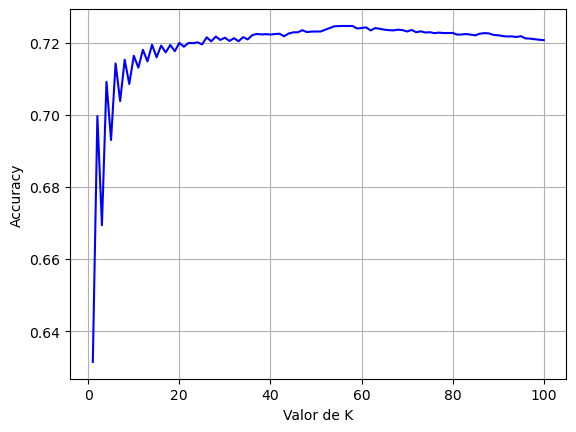

In [65]:
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color='b')
plt.xlabel('Valor de K'); plt.ylabel('Accuracy')
plt.grid(); plt.show()

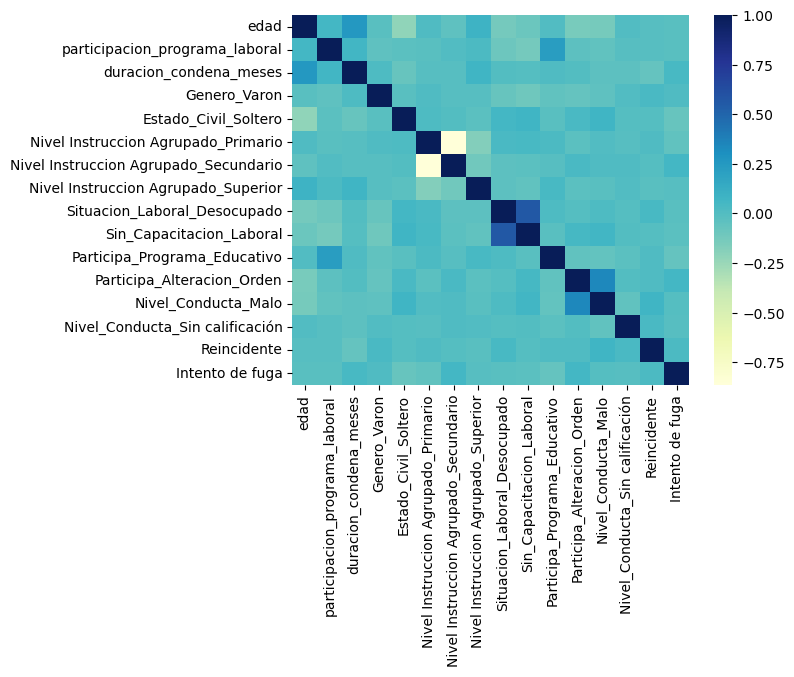

In [69]:
dataplot = sns.heatmap(data_condenados.corr(), cmap="YlGnBu", annot=False)